In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, silhouette_score

In [2]:
df = pd.read_csv('fitness_tracker_dataset.csv')

In [3]:
df.shape

(365000, 12)

In [4]:
df.head()

user_id        date  steps  calories_burned  distance_km  active_minutes  \
0      468  01-01-2023   4530          2543.02        16.10             613   
1      879  01-01-2023  11613          1720.76         8.10             352   
2      152  01-01-2023  27335          1706.35         3.57             236   
3      311  01-01-2023  13459          2912.38         6.41            1329   
4      759  01-01-2023  15378          3344.51        17.88              52   

   sleep_hours  heart_rate_avg workout_type weather_conditions location  \
0          1.5             176      Walking              Clear     Park   
1          6.3             128      Cycling                Fog     Park   
2          6.7             134         Yoga               Snow     Park   
3         11.6             116     Swimming               Rain   Office   
4          7.4              84     Swimming               Rain   Office   

      mood  
0    Tired  
1    Happy  
2  Neutral  
3    Tired  
4  Neutral

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365000 entries, 0 to 364999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             365000 non-null  int64  
 1   date                365000 non-null  object 
 2   steps               365000 non-null  int64  
 3   calories_burned     365000 non-null  float64
 4   distance_km         365000 non-null  float64
 5   active_minutes      365000 non-null  int64  
 6   sleep_hours         365000 non-null  float64
 7   heart_rate_avg      365000 non-null  int64  
 8   workout_type        312847 non-null  object 
 9   weather_conditions  365000 non-null  object 
 10  location            365000 non-null  object 
 11  mood                365000 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 33.4+ MB


In [6]:
# new_df = df[df['user_id']== 468]

In [7]:
# len(new_df)

In [8]:
# df_new = new_df.reset_index(drop=True)

In [9]:
df_new = df

In [10]:
df_new.sort_values(by=['date'])

user_id        date  steps  calories_burned  distance_km  \
0           468  01-01-2023   4530          2543.02        16.10   
658         487  01-01-2023   1771          3828.32        16.41   
659         990  01-01-2023  27597          2182.40         0.99   
660         694  01-01-2023  25438          3068.07        14.23   
661         939  01-01-2023  18359          1786.68         3.93   
...         ...         ...    ...              ...          ...   
364339      795  31-12-2023  10383          2298.88        15.86   
364340      589  31-12-2023  25691          2466.14        14.71   
364341      591  31-12-2023    502          2144.22         0.75   
364328      203  31-12-2023   5385          2245.23         7.62   
364999      279  31-12-2023  15850          1856.99         8.51   

        active_minutes  sleep_hours  heart_rate_avg workout_type  \
0                  613          1.5             176      Walking   
658                118          4.7             129      Walking   
659                234          9.2             115          NaN   
660                514          4.2              65      Walking   
661                287          5.7             158      Walking   
...                ...          ...             ...          ...   
364339            1341         11.6              60  Gym Workout   
364340              57          9.2             139      Cycling   
364341            1003          4.9              63          NaN   
364328             679          0.7             158         Yoga   
364999             168          8.7              71          NaN   

       weather_conditions location      mood  
0                   Clear     Park     Tired  
658                  Snow     Park     Happy  
659                   Fog    Other     Tired  
660                   Fog      Gym     Happy  
661                 Clear     Home   Neutral  
...                   ...      ...       ...  
364339                Fog     Home     Tired  
364340               Rain     Home  Stressed  
364341              Clear     Home     Happy  
364328                Fog   Office  Stressed  
364999                Fog     Home     Happy  

[365000 rows x 12 columns]

In [11]:
df_new

user_id        date  steps  calories_burned  distance_km  \
0           468  01-01-2023   4530          2543.02        16.10   
1           879  01-01-2023  11613          1720.76         8.10   
2           152  01-01-2023  27335          1706.35         3.57   
3           311  01-01-2023  13459          2912.38         6.41   
4           759  01-01-2023  15378          3344.51        17.88   
...         ...         ...    ...              ...          ...   
364995      251  31-12-2023  14298          3333.78         5.57   
364996      314  31-12-2023  14751          2465.31        17.93   
364997       58  31-12-2023   3340          2078.38        13.87   
364998      606  31-12-2023  16148          3279.38         6.06   
364999      279  31-12-2023  15850          1856.99         8.51   

        active_minutes  sleep_hours  heart_rate_avg workout_type  \
0                  613          1.5             176      Walking   
1                  352          6.3             128      Cycling   
2                  236          6.7             134         Yoga   
3                 1329         11.6             116     Swimming   
4                   52          7.4              84     Swimming   
...                ...          ...             ...          ...   
364995             942         11.4             136          NaN   
364996             590          5.4             116      Running   
364997            1137          0.2              99      Walking   
364998            1107          1.2              65          NaN   
364999             168          8.7              71          NaN   

       weather_conditions location      mood  
0                   Clear     Park     Tired  
1                     Fog     Park     Happy  
2                    Snow     Park   Neutral  
3                    Rain   Office     Tired  
4                    Rain   Office   Neutral  
...                   ...      ...       ...  
364995                Fog     Home     Happy  
364996               Snow    Other  Stressed  
364997                Fog     Park     Happy  
364998                Fog     Home  Stressed  
364999                Fog     Home     Happy  

[365000 rows x 12 columns]

In [12]:
df_new.isnull().sum()

user_id                   0
date                      0
steps                     0
calories_burned           0
distance_km               0
active_minutes            0
sleep_hours               0
heart_rate_avg            0
workout_type          52153
weather_conditions        0
location                  0
mood                      0
dtype: int64

In [13]:
imputer_categorical = SimpleImputer(strategy='most_frequent')
df_new[['workout_type']] = imputer_categorical.fit_transform(df_new[['workout_type']])

In [14]:
# df_new = df_new.drop(columns = ['user_id'])

In [15]:
df_new

user_id        date  steps  calories_burned  distance_km  \
0           468  01-01-2023   4530          2543.02        16.10   
1           879  01-01-2023  11613          1720.76         8.10   
2           152  01-01-2023  27335          1706.35         3.57   
3           311  01-01-2023  13459          2912.38         6.41   
4           759  01-01-2023  15378          3344.51        17.88   
...         ...         ...    ...              ...          ...   
364995      251  31-12-2023  14298          3333.78         5.57   
364996      314  31-12-2023  14751          2465.31        17.93   
364997       58  31-12-2023   3340          2078.38        13.87   
364998      606  31-12-2023  16148          3279.38         6.06   
364999      279  31-12-2023  15850          1856.99         8.51   

        active_minutes  sleep_hours  heart_rate_avg workout_type  \
0                  613          1.5             176      Walking   
1                  352          6.3             128      Cycling   
2                  236          6.7             134         Yoga   
3                 1329         11.6             116     Swimming   
4                   52          7.4              84     Swimming   
...                ...          ...             ...          ...   
364995             942         11.4             136      Cycling   
364996             590          5.4             116      Running   
364997            1137          0.2              99      Walking   
364998            1107          1.2              65      Cycling   
364999             168          8.7              71      Cycling   

       weather_conditions location      mood  
0                   Clear     Park     Tired  
1                     Fog     Park     Happy  
2                    Snow     Park   Neutral  
3                    Rain   Office     Tired  
4                    Rain   Office   Neutral  
...                   ...      ...       ...  
364995                Fog     Home     Happy  
364996               Snow    Other  Stressed  
364997                Fog     Park     Happy  
364998                Fog     Home  Stressed  
364999                Fog     Home     Happy  

[365000 rows x 12 columns]

In [16]:
df_new.isnull().sum()

user_id               0
date                  0
steps                 0
calories_burned       0
distance_km           0
active_minutes        0
sleep_hours           0
heart_rate_avg        0
workout_type          0
weather_conditions    0
location              0
mood                  0
dtype: int64

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365000 entries, 0 to 364999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             365000 non-null  int64  
 1   date                365000 non-null  object 
 2   steps               365000 non-null  int64  
 3   calories_burned     365000 non-null  float64
 4   distance_km         365000 non-null  float64
 5   active_minutes      365000 non-null  int64  
 6   sleep_hours         365000 non-null  float64
 7   heart_rate_avg      365000 non-null  int64  
 8   workout_type        365000 non-null  object 
 9   weather_conditions  365000 non-null  object 
 10  location            365000 non-null  object 
 11  mood                365000 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 33.4+ MB


In [18]:
df_new

user_id        date  steps  calories_burned  distance_km  \
0           468  01-01-2023   4530          2543.02        16.10   
1           879  01-01-2023  11613          1720.76         8.10   
2           152  01-01-2023  27335          1706.35         3.57   
3           311  01-01-2023  13459          2912.38         6.41   
4           759  01-01-2023  15378          3344.51        17.88   
...         ...         ...    ...              ...          ...   
364995      251  31-12-2023  14298          3333.78         5.57   
364996      314  31-12-2023  14751          2465.31        17.93   
364997       58  31-12-2023   3340          2078.38        13.87   
364998      606  31-12-2023  16148          3279.38         6.06   
364999      279  31-12-2023  15850          1856.99         8.51   

        active_minutes  sleep_hours  heart_rate_avg workout_type  \
0                  613          1.5             176      Walking   
1                  352          6.3             128      Cycling   
2                  236          6.7             134         Yoga   
3                 1329         11.6             116     Swimming   
4                   52          7.4              84     Swimming   
...                ...          ...             ...          ...   
364995             942         11.4             136      Cycling   
364996             590          5.4             116      Running   
364997            1137          0.2              99      Walking   
364998            1107          1.2              65      Cycling   
364999             168          8.7              71      Cycling   

       weather_conditions location      mood  
0                   Clear     Park     Tired  
1                     Fog     Park     Happy  
2                    Snow     Park   Neutral  
3                    Rain   Office     Tired  
4                    Rain   Office   Neutral  
...                   ...      ...       ...  
364995                Fog     Home     Happy  
364996               Snow    Other  Stressed  
364997                Fog     Park     Happy  
364998                Fog     Home  Stressed  
364999                Fog     Home     Happy  

[365000 rows x 12 columns]

[]

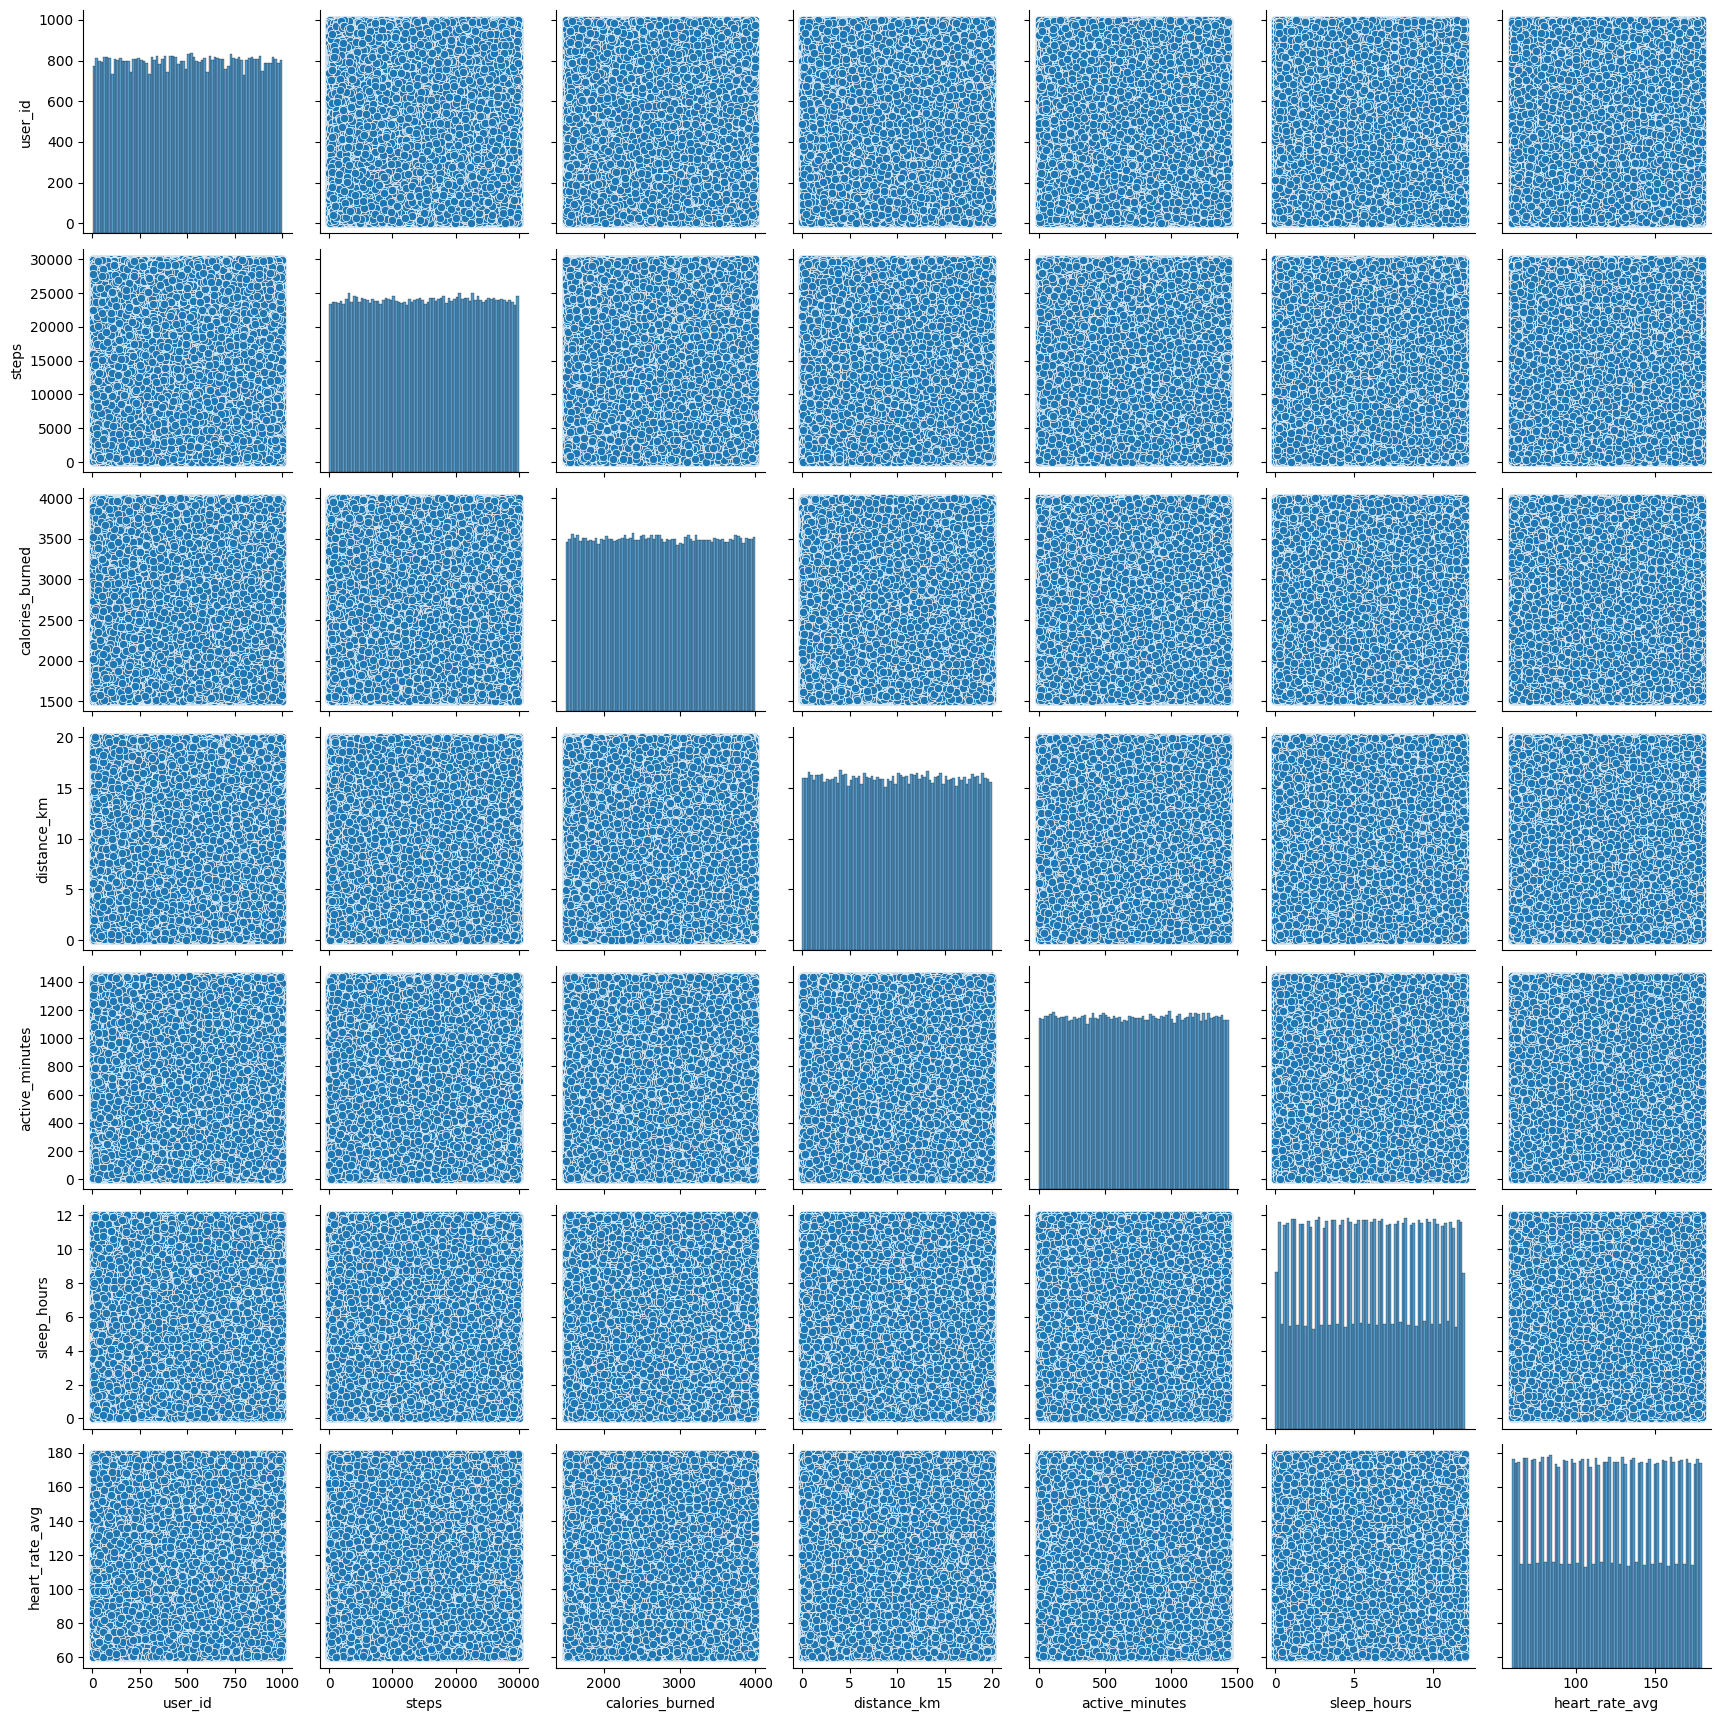

In [19]:
sns.pairplot(data = df_new)
plt.plot()

C:\Users\swaroop\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


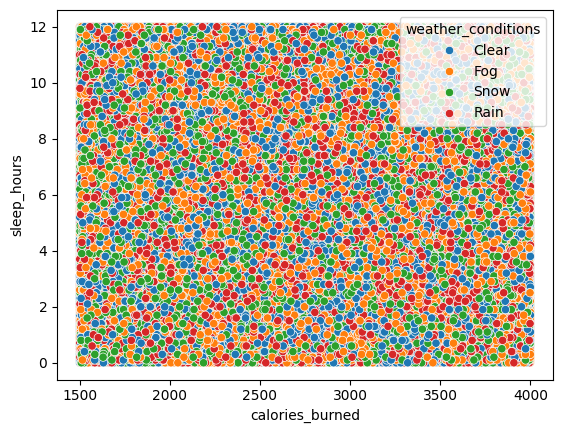

In [20]:
sns.scatterplot(data=df_new,x=df_new["calories_burned"], y=df_new["sleep_hours"], hue=df_new["weather_conditions"])
plt.show()

C:\Users\swaroop\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


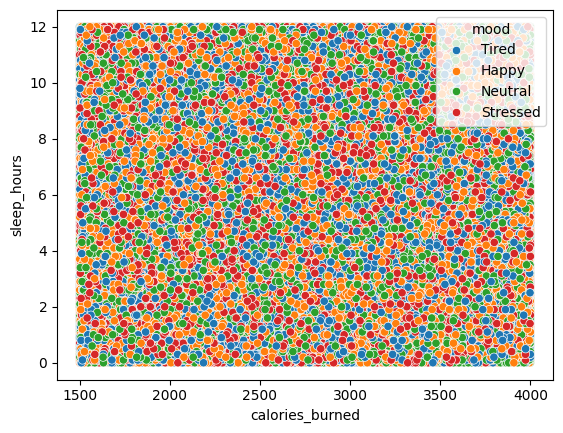

In [21]:
sns.scatterplot(data=df_new,x=df_new["calories_burned"], y=df_new["sleep_hours"], hue=df_new["mood"])
plt.show()

In [22]:
contingency_table = pd.crosstab(df_new['weather_conditions'], df_new['mood'])
print(contingency_table)

mood                Happy  Neutral  Stressed  Tired
weather_conditions                                 
Clear               22905    22754     22840  23010
Fog                 23032    22708     22968  22811
Rain                22714    22702     23015  22556
Snow                22888    22707     22628  22762


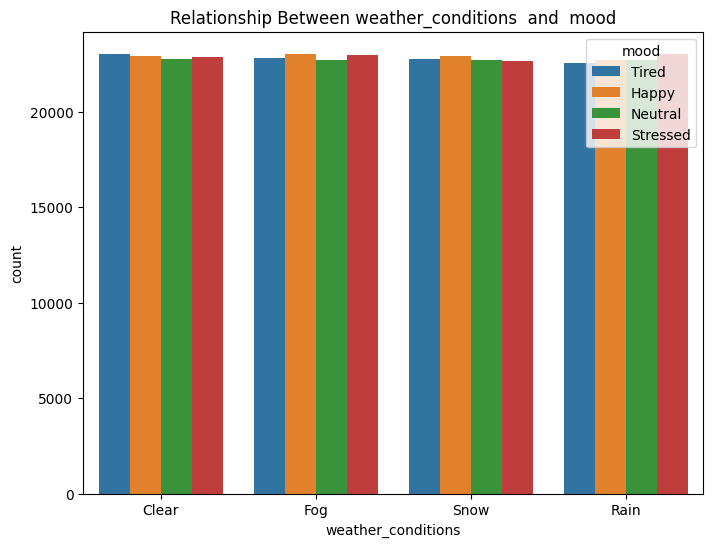

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_new, x='weather_conditions', hue='mood')
plt.title('Relationship Between weather_conditions  and  mood')
plt.show()

In [24]:
occurrences = df_new.groupby(['date', 'mood']).size().unstack(fill_value=0)

<Figure size 1200x600 with 0 Axes>

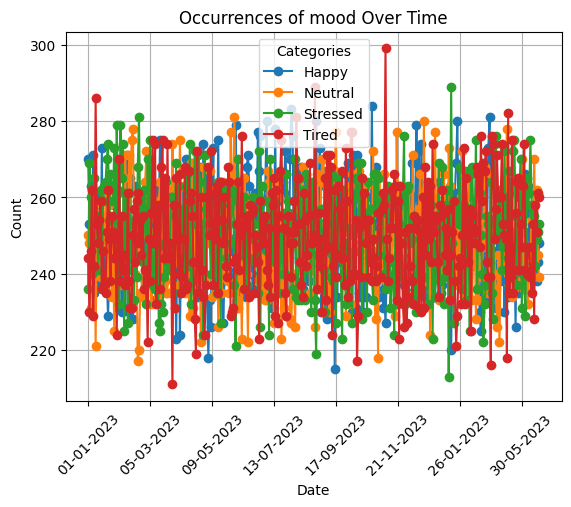

In [25]:
plt.figure(figsize=(12, 6))
occurrences.plot(kind='line', marker='o')  # Line plot with markers
plt.title('Occurrences of mood Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Categories')
plt.grid()
plt.show()

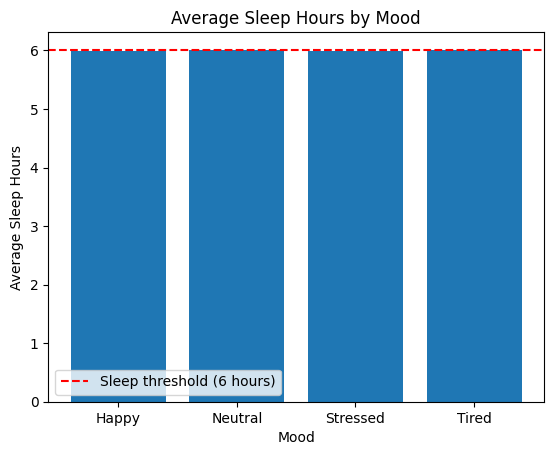

In [26]:
df_grouped = df_new.groupby('mood')['sleep_hours'].mean()

# Plot a bar plot
plt.bar(df_grouped.index, df_grouped.values)

# Add labels and title
plt.xlabel('Mood')
plt.ylabel('Average Sleep Hours')
plt.title('Average Sleep Hours by Mood')
plt.axhline(y=6, color='red', linestyle='--', label='Sleep threshold (6 hours)')

# Display the plot
plt.legend()
plt.show()

### Creating a relation between steps and calories bured

In [19]:
df_new.describe().T

count          mean          std     min      25%  \
user_id          365000.0    500.232534   287.875563     1.0   251.00   
steps            365000.0  15026.133912  8652.447558     0.0  7523.75   
calories_burned  365000.0   2749.166653   721.547577  1500.0  2125.73   
distance_km      365000.0      9.984558     5.774757     0.0     4.97   
active_minutes   365000.0    719.751241   415.988606     0.0   359.00   
sleep_hours      365000.0      6.000595     3.461335     0.0     3.00   
heart_rate_avg   365000.0    119.426518    34.655516    60.0    89.00   

                      50%       75%      max  
user_id            501.00    749.00    999.0  
steps            15058.00  22519.00  29999.0  
calories_burned   2745.25   3373.74   4000.0  
distance_km         10.00     14.97     20.0  
active_minutes     720.00   1080.00   1439.0  
sleep_hours          6.00      9.00     12.0  
heart_rate_avg     119.00    149.00    179.0

In [20]:
df_new.to_csv('eda_data.csv', index=False) 

date  steps_per_calorie  distance_km  active_minutes  \
0       01-01-2023           1.781347        16.10             613   
1       01-01-2023           6.748762         8.10             352   
2       01-01-2023          16.019574         3.57             236   
3       01-01-2023           4.621306         6.41            1329   
4       01-01-2023           4.597983        17.88              52   
...            ...                ...          ...             ...   
364995  31-12-2023           4.288825         5.57             942   
364996  31-12-2023           5.983426        17.93             590   
364997  31-12-2023           1.607021        13.87            1137   
364998  31-12-2023           4.924102         6.06            1107   
364999  31-12-2023           8.535318         8.51             168   

        sleep_hours  heart_rate_avg workout_type weather_conditions location  \
0               1.5             176      Walking              Clear     Park   
1               6.3             128      Cycling                Fog     Park   
2               6.7             134         Yoga               Snow     Park   
3              11.6             116     Swimming               Rain   Office   
4               7.4              84     Swimming               Rain   Office   
...             ...             ...          ...                ...      ...   
364995         11.4             136      Cycling                Fog     Home   
364996          5.4             116      Running               Snow    Other   
364997          0.2              99      Walking                Fog     Park   
364998          1.2              65      Cycling                Fog     Home   
364999          8.7              71      Cycling                Fog     Home   

            mood  
0          Tired  
1          Happy  
2        Neutral  
3          Tired  
4        Neutral  
...          ...  
364995     Happy  
364996  Stressed  
364997     Happy  
364998  Stressed  
364999     Happy  

[365000 rows x 10 columns]

date                  0
steps_per_calorie     0
distance_km           0
active_minutes        0
sleep_hours           0
heart_rate_avg        0
workout_type          0
weather_conditions    0
location              0
mood                  0
dtype: int64

object


## finding the day and day_of_the_week 

date  steps_per_calorie  distance_km  active_minutes  \
0      2023-01-01           1.781347        16.10             613   
1      2023-01-01           6.748762         8.10             352   
2      2023-01-01          16.019574         3.57             236   
3      2023-01-01           4.621306         6.41            1329   
4      2023-01-01           4.597983        17.88              52   
...           ...                ...          ...             ...   
364995 2023-12-31           4.288825         5.57             942   
364996 2023-12-31           5.983426        17.93             590   
364997 2023-12-31           1.607021        13.87            1137   
364998 2023-12-31           4.924102         6.06            1107   
364999 2023-12-31           8.535318         8.51             168   

        sleep_hours  heart_rate_avg workout_type weather_conditions location  \
0               1.5             176      Walking              Clear     Park   
1               6.3             128      Cycling                Fog     Park   
2               6.7             134         Yoga               Snow     Park   
3              11.6             116     Swimming               Rain   Office   
4               7.4              84     Swimming               Rain   Office   
...             ...             ...          ...                ...      ...   
364995         11.4             136      Cycling                Fog     Home   
364996          5.4             116      Running               Snow    Other   
364997          0.2              99      Walking                Fog     Park   
364998          1.2              65      Cycling                Fog     Home   
364999          8.7              71      Cycling                Fog     Home   

            mood  
0          Tired  
1          Happy  
2        Neutral  
3          Tired  
4        Neutral  
...          ...  
364995     Happy  
364996  Stressed  
364997     Happy  
364998  Stressed  
364999     Happy  

[365000 rows x 10 columns]

count                           mean  \
date                 365000  2023-07-01 23:59:59.999999744   
steps_per_calorie  365000.0                       5.895605   
distance_km        365000.0                       9.984558   
active_minutes     365000.0                     719.751241   
sleep_hours        365000.0                       6.000595   
heart_rate_avg     365000.0                     119.426518   

                                   min                  25%  \
date               2023-01-01 00:00:00  2023-04-02 00:00:00   
steps_per_calorie                  0.0              2.73834   
distance_km                        0.0                 4.97   
active_minutes                     0.0                359.0   
sleep_hours                        0.0                  3.0   
heart_rate_avg                    60.0                 89.0   

                                   50%                  75%  \
date               2023-07-02 00:00:00  2023-10-01 00:00:00   
steps_per_calorie             5.470185             8.275894   
distance_km                       10.0                14.97   
active_minutes                   720.0               1080.0   
sleep_hours                        6.0                  9.0   
heart_rate_avg                   119.0                149.0   

                                   max         std  
date               2023-12-31 00:00:00         NaN  
steps_per_calorie            19.975757    3.918532  
distance_km                       20.0    5.774757  
active_minutes                  1439.0  415.988606  
sleep_hours                       12.0    3.461335  
heart_rate_avg                   179.0   34.655516

In [36]:
df_new

date  steps_per_calorie  distance_km  active_minutes  \
0      2023-01-01           1.781347        16.10              10   
1      2023-01-01           6.748762         8.10               5   
2      2023-01-01          16.019574         3.57               3   
3      2023-01-01           4.621306         6.41              22   
4      2023-01-01           4.597983        17.88               0   
...           ...                ...          ...             ...   
364995 2023-12-31           4.288825         5.57              15   
364996 2023-12-31           5.983426        17.93               9   
364997 2023-12-31           1.607021        13.87              18   
364998 2023-12-31           4.924102         6.06              18   
364999 2023-12-31           8.535318         8.51               2   

        sleep_hours  heart_rate_avg workout_type weather_conditions location  \
0               1.5             176      Walking              Clear     Park   
1               6.3             128      Cycling                Fog     Park   
2               6.7             134         Yoga               Snow     Park   
3              11.6             116     Swimming               Rain   Office   
4               7.4              84     Swimming               Rain   Office   
...             ...             ...          ...                ...      ...   
364995         11.4             136      Cycling                Fog     Home   
364996          5.4             116      Running               Snow    Other   
364997          0.2              99      Walking                Fog     Park   
364998          1.2              65      Cycling                Fog     Home   
364999          8.7              71      Cycling                Fog     Home   

            mood  
0          Tired  
1          Happy  
2        Neutral  
3          Tired  
4        Neutral  
...          ...  
364995     Happy  
364996  Stressed  
364997     Happy  
364998  Stressed  
364999     Happy  

[365000 rows x 10 columns]

## We have removed all values greater than "20" of column "active_minutes" and  so it improve accuracy from 27 to 32

In [ ]:
df_new.shape

In [ ]:
df['sleep_hours'].max()

In [ ]:
df_new.shape

In [ ]:
df_new['mood'].value_counts()

In [ ]:
# a = df_new[(df_new['mood'] == "Happy")]
# b = df_new[(df_new['mood'] == "Tired")]
# c = df_new[(df_new['mood'] == "Neutral")]
# d = df_new[(df_new['mood'] == "Stressed")]

In [ ]:

# data_A_resampled = resample(a , replace=True, n_samples=70, random_state=0)
# data_B_resampled = resample(b, replace=True, n_samples=70, random_state=0)
# data_C_resampled = resample(c , replace=True, n_samples=70, random_state=0)
# data_D_resampled = resample(d, replace=True, n_samples=70, random_state=0)

# # Concatenate resampled data
# resampled_data = pd.concat([data_A_resampled,data_B_resampled,data_C_resampled,data_D_resampled])

In [ ]:
# resampled_data

In [ ]:
x.duplicated().sum()

In [ ]:
x.info()

In [ ]:
correlation_matrix =  x.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Step 3: Display the plot
plt.show()

In [ ]:
scaler = StandardScaler()

columsn_scale = ['steps_per_calorie','distance_km','active_minutes','sleep_hours','heart_rate_avg']
# Step 4: Fit and transform the data
x[columsn_scale] = scaler.fit_transform(resampled_data[columsn_scale])

In [ ]:
x.duplicated().sum()

In [ ]:
x

In [ ]:
y

In [ ]:
# x = resampled_data.iloc[:,:-1].values

In [ ]:
# y = resampled_data.iloc[:,-1].values

In [ ]:
resampled_data['day_of_week'].value_counts()

In [ ]:
model_dt = DecisionTreeClassifier()

In [ ]:
model_dt.fit(x_train,y_train)

In [ ]:
y_pred_dt = model_dt.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

In [ ]:
y_pred_dt1 = model_dt.predict(x_train)
print("Accuracy : ", accuracy_score(y_train, y_pred_dt1))

## Think their there is underfitting 

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
model_knn.fit(x_train,y_train)

In [ ]:
y_pred_knn = model_knn.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

In [ ]:
y_pred_knn1 = model_knn.predict(x_train)

In [ ]:
print("Accuracy : ", accuracy_score(y_train, y_pred_knn1))

### Initially the without removing active "minitues greater" than 32 was the accuracy of knn , but now the accuracy is decreased to 27 but the accuracy of other models increased

In [ ]:
model_nb = GaussianNB()

In [ ]:
model_nb.fit(x_train,y_train)

In [ ]:
y_pred_nb = model_nb.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

In [ ]:
y_pred_nb1 = model_nb.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb1))

## The Random Forest Classifier and SVC is the best model for the given dataset

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [ ]:
model_rf.fit(x_train,y_train)

In [ ]:
y_pred_rf = model_rf.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_rf))

In [ ]:
y_pred_rf1 = model_rf.predict(x_train)

In [ ]:
print("Accuracy : ", accuracy_score(y_train, y_pred_rf1))

In [ ]:
model_svc = SVC(C=1,gamma='auto')

In [ ]:
model_svc.fit(x_train,y_train)

In [ ]:
y_pred_svc = model_svc.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

In [ ]:
y_pred_svc1 = model_svc.predict(x_train)

In [ ]:
y_pred_svc1

In [ ]:
print("Accuracy : ", accuracy_score(y_train, y_pred_svc1))

In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming 'model' is your classifier
cross_val_scores = cross_val_score(model_svc, x, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Accuracy: ", cross_val_scores.mean())